# Experiment 2: perceptron implementation
***

## Importing Libraries

In [1]:
import math
import random
import numpy as np
from numpy import dot
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

## Load dataset

In [2]:
dataset = load_breast_cancer(as_frame=True)

In [3]:
X = dataset.data
y = dataset.target

In [4]:
print("Shape of Features: ", X.shape)
print("Shape of Target: ", y.shape)

Shape of Features:  (569, 30)
Shape of Target:  (569,)


In [5]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

## Train and Test Split

In [10]:
#split data to train and test(test size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [11]:
print('X train shape', X_train.shape)
print('y train shape', y_train.shape)

X train shape (398, 30)
y train shape (398,)


In [12]:
print('X test shape', X_test.shape)
print('y test shape', y_test.shape)

X test shape (171, 30)
y test shape (171,)


## Data Scaling

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train

array([[0.29624369, 0.27730808, 0.28381849, ..., 0.21839623, 0.15474078,
        0.12800949],
       [0.27812332, 0.22590463, 0.26940639, ..., 0.32576197, 0.09520993,
        0.18006104],
       [0.34276899, 0.14440311, 0.355879  , ..., 0.40203193, 0.24876799,
        0.31400475],
       ...,
       [0.32317939, 0.2404464 , 0.29937215, ..., 0.12093614, 0.17602996,
        0.05222109],
       [0.30799745, 0.33513696, 0.3052226 , ..., 0.66291727, 0.31815494,
        0.42777213],
       [0.21984426, 0.36557322, 0.20605023, ..., 0.2696299 , 0.22255076,
        0.11648016]])

In [16]:
X_test

array([[0.23404672, 0.30064254, 0.23366153, ..., 0.36828737, 0.2856298 ,
        0.27517803],
       [0.55090847, 0.39228948, 0.53695776, ..., 0.64912917, 0.19436231,
        0.09198033],
       [0.38047897, 0.33040243, 0.38070776, ..., 0.54934688, 0.25073921,
        0.21320787],
       ...,
       [0.10837945, 0.28238079, 0.11601027, ..., 0.3595791 , 0.206781  ,
        0.51848084],
       [0.30016161, 0.49983091, 0.31385559, ..., 0.55188679, 0.41119653,
        0.53628349],
       [0.2546158 , 0.14879946, 0.26120148, ..., 0.56640058, 0.21170905,
        0.53204476]])

In [17]:
y_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [18]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

## Activation Functions

In [19]:
def sigmoid(x):
    return 2 / (1 + np.exp(-x)) - 1

def sigmoid_d(x):
    return 1/2 * (1 - x**2)

def tanh(x):
    return np.tanh(x)

def tanh_d(x):
    return 1 - (x ** 2)

def step(x):
    return np.heaviside(x, 1)

def step_d(x):
    return NotImplemented

def relu(x):
    return max(0, x)

def relu_d(x):
    return int(x >= 0)

## Perceptron

In [20]:
class Perceptron:
    def __init__(self, rate=0.05, min_error=0.01, act=sigmoid, act_d=sigmoid_d, seed=1, scale=1):
        
        #learning_rate
        self.rate = rate
        #activation function
        self.act = act
        #derivative of the activation function
        self.act_d = act_d
        #minimum error
        self.min_error = min_error
        #random state
        self.random_state = np.random.RandomState(seed)
        #scale for weight and bias
        self.scale = scale

    def fit(self, X, y, epochs, export='plot.png'):
        
        #number of datas
        n = X.shape[0]
        #number of features
        m = X.shape[1]
        #initial bias
        self.b = self.random_state.random() / self.scale
        #initial weights
        self.w = self.random_state.random((1, m)) / self.scale
        
        # loss error and MSE list
        errors = []
        MSEs = []

        for epoch in range(epochs):
            error = 0
            mse = 0
            for i in range(n):
                
                #output for each data X
                o = self.predict(X[i])
                #updating weight and bias
                self.w = self.w + self.rate * (y[i] - o) * self.act_d(o) * X[i]
                self.b = self.b + self.rate * (y[i] - o) * self.act_d(o)
                
                #calculating loss error and MSE for each data
                error += 1/2 * (y[i] - o)**2
                mse += (y[i] - o)**2
            
            #add loss error and mse for each iteration to the list
            errors.append(error)
            MSEs.append(mse / n)
            print(f'> {epoch}\t{error}')
            
            #check error with minimum error
            if error < self.min_error:
                break
        #plot loss error and mse
        fig, ax = plt.subplots(2 , figsize=(10,10))
        ax[0].plot(errors)
        ax[1].plot(MSEs)
        
        ax[0].set_ylabel("loss error")
        ax[0].set_xlabel("epoch")
        ax[1].set_ylabel("MSE")
        ax[1].set_xlabel("epoch")
        
        fig.savefig(export)
    
    #output function
    def predict(self, x):
        return self.act(np.dot(self.w, x) + self.b)

> 0	[72.81890488]
> 1	[72.05607785]
> 2	[70.53924542]
> 3	[65.70387187]
> 4	[48.72139549]
> 5	[32.78125307]
> 6	[25.92986146]
> 7	[22.85271325]
> 8	[21.18370393]
> 9	[20.14876937]
> 10	[19.44275342]
> 11	[18.92544761]
> 12	[18.52504847]
> 13	[18.20171192]
> 14	[17.93190192]
> 15	[17.70098767]
> 16	[17.49947082]
> 17	[17.32094466]
> 18	[17.16093532]
> 19	[17.01621676]
> 20	[16.8843918]
> 21	[16.76362836]
> 22	[16.65248929]
> 23	[16.54982]
> 24	[16.4546728]
> 25	[16.36625509]
> 26	[16.28389311]
> 27	[16.20700624]
> 28	[16.13508834]
> 29	[16.06769406]
> 30	[16.00442853]
> 31	[15.94493947]
> 32	[15.88891101]
> 33	[15.8360588]
> 34	[15.78612601]
> 35	[15.73888006]
> 36	[15.69410985]
> 37	[15.6516234]
> 38	[15.6112459]
> 39	[15.57281786]
> 40	[15.53619369]
> 41	[15.50124027]
> 42	[15.46783576]
> 43	[15.43586858]
> 44	[15.40523642]
> 45	[15.3758454]
> 46	[15.3476093]
> 47	[15.32044888]
> 48	[15.29429124]
> 49	[15.26906929]
> 50	[15.24472119]
> 51	[15.22118996]
> 52	[15.19842301]
> 53	[15.1763

> 420	[12.76045601]
> 421	[12.75716675]
> 422	[12.75388604]
> 423	[12.75061387]
> 424	[12.74735022]
> 425	[12.74409505]
> 426	[12.74084835]
> 427	[12.7376101]
> 428	[12.73438026]
> 429	[12.73115882]
> 430	[12.72794575]
> 431	[12.72474103]
> 432	[12.72154465]
> 433	[12.71835656]
> 434	[12.71517676]
> 435	[12.71200522]
> 436	[12.70884191]
> 437	[12.70568682]
> 438	[12.70253993]
> 439	[12.6994012]
> 440	[12.69627062]
> 441	[12.69314816]
> 442	[12.69003381]
> 443	[12.68692754]
> 444	[12.68382933]
> 445	[12.68073916]
> 446	[12.677657]
> 447	[12.67458283]
> 448	[12.67151664]
> 449	[12.6684584]
> 450	[12.66540808]
> 451	[12.66236567]
> 452	[12.65933115]
> 453	[12.6563045]
> 454	[12.65328568]
> 455	[12.65027469]
> 456	[12.64727149]
> 457	[12.64427608]
> 458	[12.64128842]
> 459	[12.63830851]
> 460	[12.6353363]
> 461	[12.63237179]
> 462	[12.62941496]
> 463	[12.62646578]
> 464	[12.62352423]
> 465	[12.62059029]
> 466	[12.61766395]
> 467	[12.61474517]
> 468	[12.61183395]
> 469	[12.60893025]
> 470	[

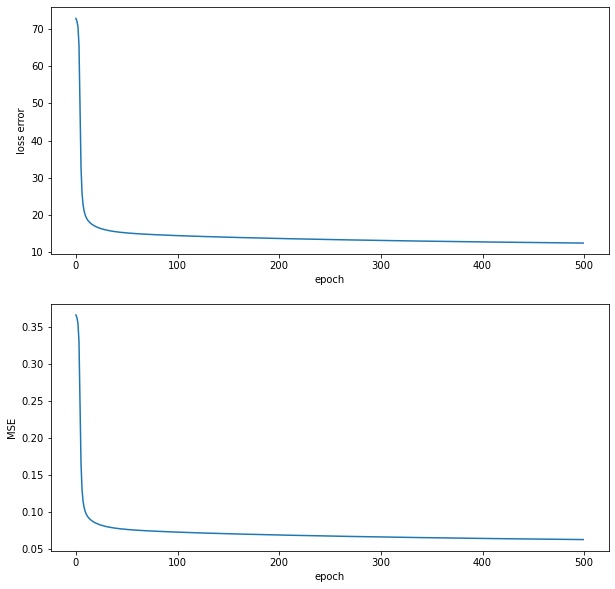

In [23]:
clf = Perceptron(act=sigmoid, act_d=sigmoid_d)
clf.fit(X_train, y_train, 500, export=f'mse.png')

## Test to perceptron

In [22]:
error = 0
mse = 0

for i in range(X_test.shape[0]):
    o = clf.predict(X_test[i])
    error += 1/2 * (y_test[i] - o)**2
    mse += (y[i] - o)**2
    
print("loss error: ", error)
print("mse: ", mse / X_test.shape[0])

loss error:  [3.72927164]
mse:  [0.44636828]
